# **<font color=white> 07.Regularized Model-Ridge Code 실습**

[목적]
  - Linear Regression
    - 단순 Linear Regression을 활용하여 변수의 중요도 및 방향성을 알아봄
    - 매우 심플한 모델이기 때문에 사이즈가 큰 데이터에 적합하지 않음
    - 하지만 설명력에서는 큰 장점이 있음
  - Ridge Regression
    - Regularized Linear Model을 활용하여 Overfitting을 방지함
    - Hyperparameter lamba를 튜닝할 때 for loop 뿐만 아니라 GridsearchCV를 통해 돌출해봄
  - Regularized Linear Models의 경우 X's Scaling을 필수적으로 진행해야함

[Process]
- Define X's & Y
- Split Train & Valid dataset
- Modeling
- Model 해석

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_diabetes

In [3]:
# 당뇨병 데이터
data = load_diabetes()

In [4]:
print('X Shape : {}'.format(data['data'].shape))
print('Y Shape : {}'.format(data['target'].shape))

X Shape : (442, 10)
Y Shape : (442,)


In [5]:
# 데이터 설명
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
pd.DataFrame(data['data'], columns=data['feature_names']).describe().applymap(lambda x : f"{x:0.2f}")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


In [7]:
data = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')

In [8]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [10]:
# x's Y Split
Y = data['Y']
X = data.drop(columns=['Y'])
X = pd.get_dummies(X, columns=['SEX'])

In [11]:
X

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX_1,SEX_2
0,59,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,0,1
1,48,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,1,0
2,72,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,0,1
3,24,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,1,0
4,50,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...
437,60,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,0,1
438,47,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,0,1
439,60,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,0,1
440,36,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,1,0


[Data Split]

- Data Split을 진행할 때 BigData의 경우 꼭 indexing을 추출하여 모델에 적용시켜야 함
- 이유는 Data Split하여 새로운 Data set을 만들 경우 메모리에 부담을 주기 때문

In [17]:
# 나는 처음보는 방식임 메모리 부담이 적은 좋은 방법을 알아낸듯
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print('# of Train data : {}'.format(len(train_idx)))
print('# of valid data : {}'.format(len(valid_idx)))

# of Train data : 309
# of valid data : 133


In [19]:
# Linear Regression
results = LinearRegression().fit(X.iloc[train_idx], Y.iloc[train_idx])
results

LinearRegression()

In [20]:
## 이 부분 좀 복습할 필요가 있지 않을까?
import scipy
from sklearn import metrics

def sse(clf, X, y):
    """Calculate the standard squared error of the model.
    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    Returns
    -------
    float
        The standard squared error of the model.
    """
    y_hat = clf.predict(X)
    sse = np.sum((y_hat - y) ** 2)
    return sse / X.shape[0]


def adj_r2_score(clf, X, y):
    """Calculate the adjusted :math:`R^2` of the model.
    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    Returns
    -------
    float
        The adjusted :math:`R^2` of the model.
    """
    n = X.shape[0]  # Number of observations
    p = X.shape[1]  # Number of features
    r_squared = metrics.r2_score(y, clf.predict(X))
    return 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))


def coef_se(clf, X, y):
    """Calculate standard error for beta coefficients.
    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    Returns
    -------
    numpy.ndarray
        An array of standard errors for the beta coefficients.
    """
    n = X.shape[0]
    X1 = np.hstack((np.ones((n, 1)), np.matrix(X)))
    se_matrix = scipy.linalg.sqrtm(
        metrics.mean_squared_error(y, clf.predict(X)) *
        np.linalg.inv(X1.T * X1)
    )
    return np.diagonal(se_matrix)


def coef_tval(clf, X, y):
    """Calculate t-statistic for beta coefficients.
    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    Returns
    -------
    numpy.ndarray
        An array of t-statistic values.
    """
    a = np.array(clf.intercept_ / coef_se(clf, X, y)[0])
    b = np.array(clf.coef_ / coef_se(clf, X, y)[1:])
    return np.append(a, b)


def coef_pval(clf, X, y):
    """Calculate p-values for beta coefficients.
    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    Returns
    -------
    numpy.ndarray
        An array of p-values.
    """
    n = X.shape[0]
    t = coef_tval(clf, X, y)
    p = 2 * (1 - scipy.stats.t.cdf(abs(t), n - 1))
    return p

def summary(clf, X, y, xlabels=None):
    """
    Output summary statistics for a fitted regression model.
    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    xlabels : list, tuple
        The labels for the predictors.
    """
    # Check and/or make xlabels
    ncols = X.shape[1]
    if xlabels is None:
        xlabels = np.array(
            ['x{0}'.format(i) for i in range(1, ncols + 1)], dtype='str')
    elif isinstance(xlabels, (tuple, list)):
        xlabels = np.array(xlabels, dtype='str')
    # Make sure dims of xlabels matches dims of X
    if xlabels.shape[0] != ncols:
        raise AssertionError(
            "Dimension of xlabels {0} does not match "
            "X {1}.".format(xlabels.shape, X.shape))
    # Create data frame of coefficient estimates and associated stats
    coef_df = pd.DataFrame(
        index=['_intercept'] + list(xlabels),
        columns=['Estimate', 'Std. Error', 't value', 'p value']
    )
    try:
        coef_df['Estimate'] = np.concatenate(
            (np.round(np.array([clf.intercept_]), 6), np.round((clf.coef_), 6)))
    except Exception as e:
        coef_df['Estimate'] = np.concatenate(
            (
                np.round(np.array([clf.intercept_]), 6),
                np.round((clf.coef_), 6)
            ), axis = 1
    )[0,:]
    coef_df['Std. Error'] = np.round(coef_se(clf, X, y), 6)
    coef_df['t value'] = np.round(coef_tval(clf, X, y), 4)
    coef_df['p value'] = np.round(coef_pval(clf, X, y), 6)
    # Output results
    print('Coefficients:')
    print(coef_df.to_string(index=True))
    print('---')
    print('R-squared:  {0:.6f},    Adjusted R-squared:  {1:.6f},    MSE: {2:.1f}'.format(
        metrics.r2_score(y, clf.predict(X)), adj_r2_score(clf, X, y), sse(clf, X, y)))

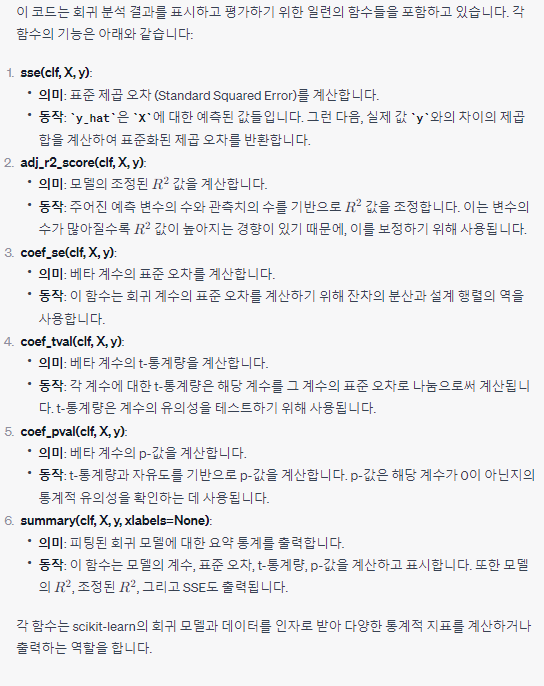

In [21]:
summary(results, X.iloc[valid_idx], Y.iloc[valid_idx], xlabels=X.columns)

Coefficients:
              Estimate                  Std. Error         t value   p value
_intercept -353.422717  3.804036e+08+7.000000e-06j -0.0000+0.0000j  0.999999
AGE          -0.241046  3.422080e-01+4.798600e-02j -0.6908+0.0969j  0.486679
BMI           5.364734  1.263233e+00+3.469000e-03j  4.2468-0.0117j  0.000041
BP            0.973515  3.572040e-01+5.036500e-02j  2.6723-0.3768j  0.007872
S1           -1.128987  3.352920e-01+3.755700e-02j -3.3255+0.3725j  0.001067
S2            0.935342  3.647620e-01+8.590000e-04j  2.5642-0.0060j  0.011459
S3            0.295834  4.142180e-01+1.898200e-02j  0.7127-0.0327j  0.476827
S4            2.577375  1.011969e+01+1.900000e-05j  0.2547-0.0000j  0.799360
S5           72.840272  2.200654e+01+1.290000e-04j  3.3099-0.0000j  0.001203
S6            0.292290  3.809690e-01+4.572100e-02j  0.7563-0.0908j  0.447561
SEX_1        10.444984  3.804036e+08+3.000000e-06j  0.0000-0.0000j  1.000000
SEX_2       -10.444984  3.804036e+08-2.000000e-06j -0.0000-0.0

In [22]:
# Scaling
scaler = MinMaxScaler().fit(X.iloc[train_idx])
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [23]:
X_scal

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX_1,SEX_2
0,0.666667,0.573840,0.565217,0.294118,0.297578,0.197368,0.318471,0.562217,0.439394,0.0,1.0
1,0.483333,0.130802,0.362319,0.421569,0.355248,0.618421,0.159236,0.222437,0.166667,1.0,0.0
2,0.883333,0.506329,0.449275,0.289216,0.299885,0.236842,0.318471,0.496578,0.409091,0.0,1.0
3,0.083333,0.286920,0.318841,0.495098,0.517878,0.223684,0.477707,0.572923,0.469697,1.0,0.0
4,0.516667,0.189873,0.565217,0.465686,0.483276,0.381579,0.318471,0.362385,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.683333,0.409283,0.724638,0.431373,0.416378,0.250000,0.318471,0.605672,0.530303,0.0,1.0
438,0.466667,0.270042,0.188406,0.627451,0.717416,0.250000,0.477707,0.415810,0.666667,0.0,1.0
439,0.683333,0.270042,0.545942,0.318627,0.374856,0.263158,0.281847,0.305030,0.560606,0.0,1.0
440,0.283333,0.485232,0.478261,0.509804,0.482122,0.250000,0.444268,0.657026,0.409091,1.0,0.0


[Ridge Regression]
 - Hyperparameter Tuning using for Loop
 - Hyperparameter Tuning using GridSearchCV

[Ridge Regression Parameters]
   - Package : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
   - alpha : L2-norm Penalty Term
     - alpha : 0 일 때, Just Linear Regression
   - fit_intercept : Centering to zero
     - 베타0를 0로 보내는 것 (베타0는 상수이기 때문에)
   - max_iter : Maximum number of interation
     - Loss Function의 Ridge Penalty Term은 Closed Form 값이기는 하지만 값을 찾아 나감
     - Penalty Term : (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_2

In [24]:
penelty = [0.00001, 0.00005, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.6, 0.7, 0.9, 1, 10]

# Using For Loop !!
# Ridge Regression
# select alpha by checking R2, MSE, RMSE
for a in penelty:
    model = Ridge(alpha=a).fit(X_scal.iloc[train_idx], Y.iloc[train_idx])
    score = model.score(X_scal.iloc[valid_idx], Y.iloc[valid_idx])
    pred_y = model.predict(X_scal.iloc[valid_idx])
    mse = mean_squared_error(Y.iloc[valid_idx], pred_y)
    print("Alpha:{0:.5f}, R2:{1:.7f}, MSE:{2:.7f}, RMSE:{3:.7f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.00001, R2:0.5301655, MSE:3084.6095744, RMSE:55.5392616
Alpha:0.00005, R2:0.5301672, MSE:3084.5988322, RMSE:55.5391648
Alpha:0.00010, R2:0.5301692, MSE:3084.5854446, RMSE:55.5390443
Alpha:0.00100, R2:0.5302048, MSE:3084.3519225, RMSE:55.5369420
Alpha:0.01000, R2:0.5304637, MSE:3082.6522133, RMSE:55.5216373
Alpha:0.10000, R2:0.5304511, MSE:3082.7343410, RMSE:55.5223769
Alpha:0.30000, R2:0.5294946, MSE:3089.0142040, RMSE:55.5789007
Alpha:0.50000, R2:0.5285641, MSE:3095.1232917, RMSE:55.6338323
Alpha:0.60000, R2:0.5280578, MSE:3098.4477026, RMSE:55.6637018
Alpha:0.70000, R2:0.5275205, MSE:3101.9751863, RMSE:55.6953785
Alpha:0.90000, R2:0.5263592, MSE:3109.5989675, RMSE:55.7637783
Alpha:1.00000, R2:0.5257398, MSE:3113.6657269, RMSE:55.8002305
Alpha:10.00000, R2:0.4513724, MSE:3601.9109235, RMSE:60.0159222


In [25]:
model_best = Ridge(alpha=0.01).fit(X_scal.iloc[train_idx], Y.iloc[train_idx])
summary(model_best, X_scal.iloc[valid_idx], Y.iloc[valid_idx], xlabels = X_scal.columns)

Coefficients:
              Estimate                  Std. Error         t value   p value
_intercept    3.351510  3.802827e+08+0.000000e+00j  0.0000-0.0000j  1.000000
AGE         -14.279970  2.369723e+01+0.000000e+00j -0.6026+0.0000j  0.547808
BMI         127.331685  3.180075e+01+0.000000e+00j  4.0040-0.0000j  0.000103
BP           67.279481  2.813312e+01+0.000000e+00j  2.3915-0.0000j  0.018192
S1         -203.277222  1.636362e+02-0.000000e+00j -1.2423-0.0000j  0.216346
S2          141.209566  1.154550e+02-0.000000e+00j  1.2231+0.0000j  0.223482
S3           10.619292  7.274272e+01-0.000000e+00j  0.1460+0.0000j  0.884157
S4           13.868910  5.720987e+01-0.000000e+00j  0.2424+0.0000j  0.808830
S5          198.003880  5.017583e+01+0.000000e+00j  3.9462-0.0000j  0.000128
S6           19.251667  3.420874e+01-0.000000e+00j  0.5628+0.0000j  0.574546
SEX_1        10.473795  3.802827e+08+0.000000e+00j  0.0000-0.0000j  1.000000
SEX_2       -10.473795  3.802827e+08+0.000000e+00j -0.0000+0.0

In [26]:
# Using GridSearchCV
ridge_cv = RidgeCV(alphas=penelty, cv=5)
model = ridge_cv.fit(X_scal.iloc[train_idx], Y.iloc[train_idx])
print('Best Alpha:{0:.5f}, R2:{1:.4f}'.format(model.alpha_, model.best_score_))

Best Alpha:0.90000, R2:0.4419


In [27]:
# GridSearchCV Result
model_best = Ridge(alpha=model.alpha_).fit(X_scal.iloc[train_idx], Y.iloc[train_idx])
score = model_best.score(X_scal.iloc[valid_idx], Y.iloc[valid_idx])
pred_y = model_best.predict(X_scal.iloc[valid_idx])
mse = np.sqrt(mean_squared_error(Y.iloc[valid_idx], pred_y))
print("Alpha:{0:.5f}, R2:{1:.7f}, MSE:{2:.7f}, RMSE:{3:.7f}".format(0.01, score, mse, np.sqrt(mse)))
summary(model_best, X_scal.iloc[valid_idx], Y.iloc[valid_idx], xlabels=X_scal.columns)

Alpha:0.01000, R2:0.5263592, MSE:55.7637783, RMSE:7.4675149
Coefficients:
              Estimate                  Std. Error         t value   p value
_intercept   42.643650  3.819412e+08+1.308048e+00j  0.0000-0.0000j  1.000000
AGE         -10.492753  2.379306e+01+1.368090e-01j -0.4410+0.0025j  0.659939
BMI         121.677019  3.185560e+01+1.175510e-01j  3.8196-0.0141j  0.000205
BP           66.649695  2.809700e+01+2.136490e-01j  2.3720-0.0180j  0.019133
S1          -21.091765  1.642265e+02+2.031570e-01j -0.1284+0.0002j  0.898004
S2           -5.450923  1.152949e+02+5.286150e-01j -0.0473+0.0002j  0.962363
S3          -55.208206  7.328338e+01-1.523860e-01j -0.7533-0.0016j  0.452581
S4           17.858217  5.733621e+01+1.527930e-01j  0.3115-0.0008j  0.755939
S5          119.080753  5.044998e+01+5.800700e-02j  2.3604-0.0027j  0.019721
S6           22.603065  3.410336e+01+2.433040e-01j  0.6627-0.0047j  0.508637
SEX_1        10.489062  3.819412e+08+1.290408e+00j  0.0000-0.0000j  1.000000
SE

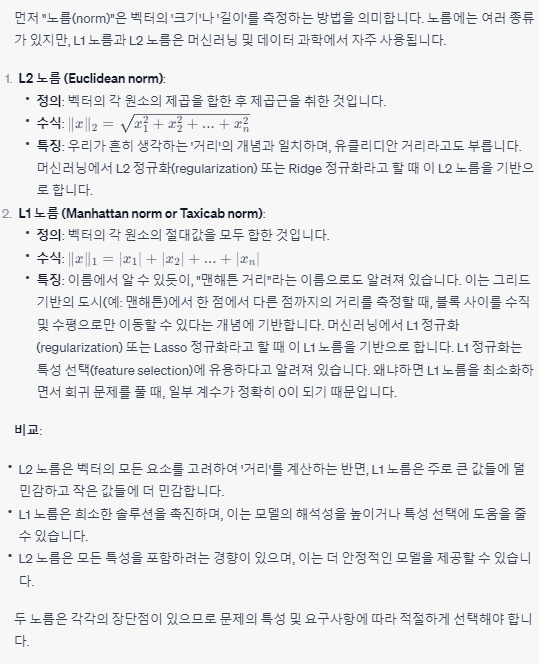